<a href="https://colab.research.google.com/github/zuzanadostalova/Tutorials/blob/master/3)_Practical_assignment_minimal_distance_head_to_head_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment**:
Count the head to head (5' end to 5' end) distance between reads in the BED file containing FUS gene from Homo sapiens K562 (https://www.encodeproject.org/files/ENCFF861KMV/). Plot a distribution plot of the distances between reads.


Download the BED file, unzip it, sort it in an ascending order by the chromosome name and the start coordinate. Create a dictionary with reads separated into those on the plus and those on the minus strand. Subsequently, create a dictionary with the chromosomes, strands, and the smallest head to head distance between the reads. Create a dataframe, and plot a distribution plot of the minimal distance between the reads.

#**Distribution of the head to head distance between reads - step by step approach.**

I. Download the BED file. You can use the BED reader function from the Python package.

In [128]:
# Import get and decompress functions which you will need for the BED reader function.
from requests import get
from gzip import decompress

# Define a function that will download the compressed (gz) BED file,
# and it will decompress it to text.
# Helper function get_gzipped_bed_ is inside the main bed_reader function.
def bed_reader(target_url, output_name):
  def get_gzipped_bed_(target_url):
    downloaded_bed = get(target_url).content
    decompressed_bed = decompress(downloaded_bed)
    return decompressed_bed
  # Decode from URL to utf-8 (byte sequence)
  decompressed = get_gzipped_bed_(target_url)
  bed_file_human_readable = decompressed.decode()
  # Write bed file to new file on the disk
  output_file = open(output_name, "w")
  output_file.write(bed_file_human_readable)
  output_file.close()
  return output_name

# Call the outer function and provide it with two arguments - url and arbitrary 
# output name.
bed_reader("https://www.encodeproject.org/files/ENCFF861KMV/@@download/ENCFF861KMV.bed.gz", 
           "ENCFF861KMV.bed")

'ENCFF861KMV.bed'

II. Sort the BED file in the ascending order by the chromosome name and the start coordinate.

In [0]:
# Sort out the BED file, and save the content in a file.
!sort -k1,1 -k2,2n ENCFF861KMV.bed > ENCFF861KMVsorted.bed

III. Create a dictionary with reads separated into those on the plus and those on the minus strand.

In [130]:
# Create an empty dictionary.
dict_r = {}
# Open sorted BED file.
with open("ENCFF861KMVsorted.bed", "r") as text:
  # Read the content line by line.
  for line in text.readlines():
    # Define column, chrom_name, start, end, and strand.
    column = line.strip().split("\t")
    chrom_name = column[0]
    start = int(column[1])
    end = int(column[2])
    strand = column[5]
    # If the chromosome name exists in the dictionary already,
    # put the strand inside without creating a new dictionary
    # with the same chromosome name.
    if chrom_name in dict_r:
      # If the dictionary strand already exists in the dictionary 
      # chromosome name, put the end/start inside without creating
      # a new strand key.
      if strand in dict_r[chrom_name]:
        # In case of the plus strand, append end coordinate to the list where 
        #the 5' end (head) occurs.
        if strand == "+":
          dict_r[chrom_name][strand].append(end) 
        # If the strand is minus, append start to the list,
        # the reason being that minus strand is in reversed
        # order - start coordinate presents the 5' end (head).
        else:
          dict_r[chrom_name][strand].append(start)
      # If the strand does not yet exist in
      # the chromosome name dictionary, it is
      # created and a list is created inside.
      else:
        dict_r[chrom_name][strand] = []
        # To fill the new strand dictionary,
        # you need to provide also the code for strand dictionary
        # creation, the +/- keey, and the end/start coordinates
        # inside the list.
        if strand == "+":
          dict_r[chrom_name][strand].append(end) 
        else:
          dict_r[chrom_name][strand].append(start)
    # If the chromosome name is not yet in the dictionary, 
    #create it.
    else:
      # Create a new dictionary inside the chromosome name
      # dictionary.
      dict_r[chrom_name] = {}
      # To fill the new "chrom_name" dictionary, you need to 
      # provide also the code for strand dictionary
      # creation, the +/- key, and the end/start coordinates
      # inside the list.
      # The key of this dictionary is strand and the value
      # is a new list.
      dict_r[chrom_name][strand] = []
      # If the strand is plus, append end to the list.
      if strand == "+":
        dict_r[chrom_name][strand].append(end) 
      # If the strand is minus, append start to the list.
      else:
        dict_r[chrom_name][strand].append(start)

print(dict_r) # Printing the dictionary with reads.

{'chr1': {'+': [632615, 965476, 1035512, 1035948, 1036051, 1036425, 1036620, 1036982, 1037181, 1037673, 1038119, 1038931, 1039324, 1052607, 1052674, 1052780, 1052983, 1401597, 2229974, 2230166, 2230457, 2231045, 2231292, 2231443, 2231870, 2232408, 2232980, 2233367, 2233574, 2233761, 2234098, 2234159, 2234224, 2234371, 2235669, 2235842, 2236263, 2236848, 2237372, 2238386, 2238656, 2239382, 2239492, 2239742, 2240261, 2240391, 2240564, 2242038, 2242280, 2242396, 2246792, 2247353, 2248268, 2248932, 2248994, 2249516, 2251684, 2252579, 2252678, 2253778, 2267630, 2267706, 2268546, 2268738, 2269725, 2270337, 2273315, 2273431, 2273517, 2273694, 2284846, 2292376, 2293299, 2392227, 2392892, 2393305, 2393546, 2393680, 2394245, 2394449, 2394523, 2394843, 2395026, 2395340, 2395459, 11023866, 12012503, 15848009, 15848859, 15849500, 15849614, 16449572, 19608149, 23371387, 25821297, 28565238, 28565957, 35883484, 35883599, 35884017, 42975410, 44760621, 44763253, 44763387, 46310195, 55040388, 55047820, 5

IV. Create a dictionary with the chromosomes and the smallest head to head distance.

There are two options how to avoid error induced 
when "for" loop reaches the end of the dictionary.

A) Try and except IndexError approach.

In [160]:
# Create empty dictionary.
dict_dis = {}
# For each chromosome in the dictionary of reads create a chrom_name in the new 
# dictionary of distance. Simultaneously, the lists for the plus and for the minus 
# strand will be created. Note: You need to define chrom_name variable again, 
# because it is not defined here yet - "for chrom_name".
for chrom_name in dict_r:
  dict_dis[chrom_name] = {"+" : list(), "-" : list()}
  # Sort the plus and the minus strand into the corresponding list in the same manner 
  # as in the III. 
  for strand in dict_r[chrom_name]:
    if strand == "+":
      # Once the for loop reaches the end of the dictionary, the error occurs
      # because e + 1 is no more possible. This can be avoided by "try"
      # and "except IndexError".
      try:
        # For index in the range from 0 to the last of the reads on the plus
        # strand in the dictionary of reads.
        for e in range(0,len(dict_r[chrom_name][strand])):
          # Subtract the left end (index) from the right end (index + 1).
          # Append the obtained distance to the plus strand. Carry on till the
          # end of the dictionary.
          right_end = dict_r[chrom_name][strand][e+1]          
          left_end = dict_r[chrom_name][strand][e]        
          distance = right_end - left_end 
          dict_dis[chrom_name][strand].append(distance)
      except IndexError:
        "null"
    else:
      try:
        # For index in the range from 0 to the last of the reads on the minus
        # strand in the dictionary of reads.
        for s in range(0,len(dict_r[chrom_name][strand])): 
          # Subtract the left start (index) from the right start (index + 1).
          # Append the obtained distance to the minus strand. Carry on till the
          # end of the dictionary.
          right_start = dict_r[chrom_name][strand][s+1]          
          left_start = dict_r[chrom_name][strand][s]        
          distance = right_start - left_start
          dict_dis[chrom_name][strand].append(distance)
      except IndexError:
        "null"
        
print(dict_r) # Printing the dictionary with reads.
print(dict_dis) # Printing the dictionary with the closest distance.

{'chr1': {'+': [632615, 965476, 1035512, 1035948, 1036051, 1036425, 1036620, 1036982, 1037181, 1037673, 1038119, 1038931, 1039324, 1052607, 1052674, 1052780, 1052983, 1401597, 2229974, 2230166, 2230457, 2231045, 2231292, 2231443, 2231870, 2232408, 2232980, 2233367, 2233574, 2233761, 2234098, 2234159, 2234224, 2234371, 2235669, 2235842, 2236263, 2236848, 2237372, 2238386, 2238656, 2239382, 2239492, 2239742, 2240261, 2240391, 2240564, 2242038, 2242280, 2242396, 2246792, 2247353, 2248268, 2248932, 2248994, 2249516, 2251684, 2252579, 2252678, 2253778, 2267630, 2267706, 2268546, 2268738, 2269725, 2270337, 2273315, 2273431, 2273517, 2273694, 2284846, 2292376, 2293299, 2392227, 2392892, 2393305, 2393546, 2393680, 2394245, 2394449, 2394523, 2394843, 2395026, 2395340, 2395459, 11023866, 12012503, 15848009, 15848859, 15849500, 15849614, 16449572, 19608149, 23371387, 25821297, 28565238, 28565957, 35883484, 35883599, 35884017, 42975410, 44760621, 44763253, 44763387, 46310195, 55040388, 55047820, 5

B) Exclusion of the last index with - 1.

In [132]:
# Create empty dictionary.
dict_dis = {}
# For each chromosome in the dictionary of reads create a chrom_name in the new
# dictionary of distance. Simultaneously, the lists for the plus and for the minus 
# strand will be created. Note: You need to define chrom_name variable again, 
# because it is not defined here yet - "for chrom_name".
for chrom_name in dict_r:
  dict_dis[chrom_name] = {"+" : list(), "-" : list()}
  # Sort plus and minus strand into the corresponding list in the same manner 
  # as in the III.
  for strand in dict_r[chrom_name]:
    if strand == "+":
      # Once the for loop reaches the end of the dictionary, the error occurs
      # because e + 1 is no more possible. This can avoided by excluding 
      # the last index with - 1.
      for e in range(0,len(dict_r[chrom_name][strand]) - 1 ):
        right_end = dict_r[chrom_name][strand][e+1]          
        left_end = dict_r[chrom_name][strand][e]        
        distance = right_end - left_end 
        dict_dis[chrom_name][strand].append(distance)
  
    else:
      for s in range(0,len(dict_r[chrom_name][strand]) - 1 ):
          right_start = dict_r[chrom_name][strand][s+1]          
          left_start = dict_r[chrom_name][strand][s]        
          distance = right_start - left_start
          dict_dis[chrom_name][strand].append(distance)
        
print(dict_r) # Printing the dictionary with reads.
print(dict_dis) # Printing the dictionary with the minimal distances.

{'chr1': {'+': [632615, 965476, 1035512, 1035948, 1036051, 1036425, 1036620, 1036982, 1037181, 1037673, 1038119, 1038931, 1039324, 1052607, 1052674, 1052780, 1052983, 1401597, 2229974, 2230166, 2230457, 2231045, 2231292, 2231443, 2231870, 2232408, 2232980, 2233367, 2233574, 2233761, 2234098, 2234159, 2234224, 2234371, 2235669, 2235842, 2236263, 2236848, 2237372, 2238386, 2238656, 2239382, 2239492, 2239742, 2240261, 2240391, 2240564, 2242038, 2242280, 2242396, 2246792, 2247353, 2248268, 2248932, 2248994, 2249516, 2251684, 2252579, 2252678, 2253778, 2267630, 2267706, 2268546, 2268738, 2269725, 2270337, 2273315, 2273431, 2273517, 2273694, 2284846, 2292376, 2293299, 2392227, 2392892, 2393305, 2393546, 2393680, 2394245, 2394449, 2394523, 2394843, 2395026, 2395340, 2395459, 11023866, 12012503, 15848009, 15848859, 15849500, 15849614, 16449572, 19608149, 23371387, 25821297, 28565238, 28565957, 35883484, 35883599, 35884017, 42975410, 44760621, 44763253, 44763387, 46310195, 55040388, 55047820, 5

To ilustrate how this iteration for e/s in range works, you can iterate over the string bellow:

In [159]:
test = list("HELLOWORLD")
print("The length  of the string is:", len(test))

# The -1 will omit the last character - in this case "D". Because in the case
# of the dictionary creation above, you do not need the last start/end 
# coordinate. Since there is no other following coordinate, you do not need
# to calcute any other distance.
for i in range(0, len(test) - 1):
  print("The index is:", i, "The current letter is:", test[i], 
        "The next letter is:", test[i+1])

The length  of the string is: 10
The index is: 0 The current letter is: H The next letter is: E
The index is: 1 The current letter is: E The next letter is: L
The index is: 2 The current letter is: L The next letter is: L
The index is: 3 The current letter is: L The next letter is: O
The index is: 4 The current letter is: O The next letter is: W
The index is: 5 The current letter is: W The next letter is: O
The index is: 6 The current letter is: O The next letter is: R
The index is: 7 The current letter is: R The next letter is: L
The index is: 8 The current letter is: L The next letter is: D


V. Plot the distribution plot.

I. To plot the data from the dictionary, you need to convert the dictionary into
dataframe. 

In [134]:
#seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
import pandas as pd

# Create an empty list.
list_plus = list()
list_min = list()
# Loop over the chromosome names in the dictionary. 
for chrom_name in dict_dis:
  #print("chrom name:", chrom_name)
  # Create a temporary dictionary with the strands.
  dict_chrom_tmp = dict_dis[chrom_name]
  # Loop over strands in the temporary dictionary.
  for strand in dict_chrom_tmp:
    if strand == "+":
    #print("chrom name:", chrom_name, strand)
    # Define the distance.
      distance = dict_chrom_tmp[strand]
    # Create a pandas daraframe with following columns:
    # distance, strand, and chromosome. 
      dict_plus = pd.DataFrame(distance, columns=["distance"])
      dict_plus["strand"] = strand
      dict_plus["chromosome"] = chrom_name
    # Append all of the dataframes from the temporary dictionary
    # to the list.
      list_plus.append(dict_plus)
    else:
      distance = dict_chrom_tmp[strand]
    # Create a pandas daraframe with following columns:
    # distance, strand, and chromosome. 
      dict_min = pd.DataFrame(distance, columns=["distance"])
      dict_min["strand"] = strand
      dict_min["chromosome"] = chrom_name
    # Append all of the dataframes from the temporary dictionary
    # to the list.
      list_min.append(dict_min)

# You need to concatenate the list of dataframes into a new dataframe.    
df_plus = pd.concat(list_plus)
df_minus = pd.concat(list_min)
print(df_plus)
print(df_minus)
# Each column is a Pandas series.

   distance strand chromosome
0    332861      +       chr1
1     70036      +       chr1
2       436      +       chr1
3       103      +       chr1
4       374      +       chr1
..      ...    ...        ...
25      401      +       chrX
26     4868      +       chrX
27       47      +       chrX
28  1072279      +       chrX
29     9162      +       chrX

[2321 rows x 3 columns]
    distance strand chromosome
0      22986      -       chr1
1     106893      -       chr1
2        258      -       chr1
3         90      -       chr1
4        194      -       chr1
..       ...    ...        ...
37   4695313      -       chrX
38  47368070      -       chrX
39  50901555      -       chrX
40     19738      -       chrX
41   2037975      -       chrX

[2103 rows x 3 columns]


II. You have three options how to plot the distribution plot:

A. You can plot the plus and the minus strand into one plot.

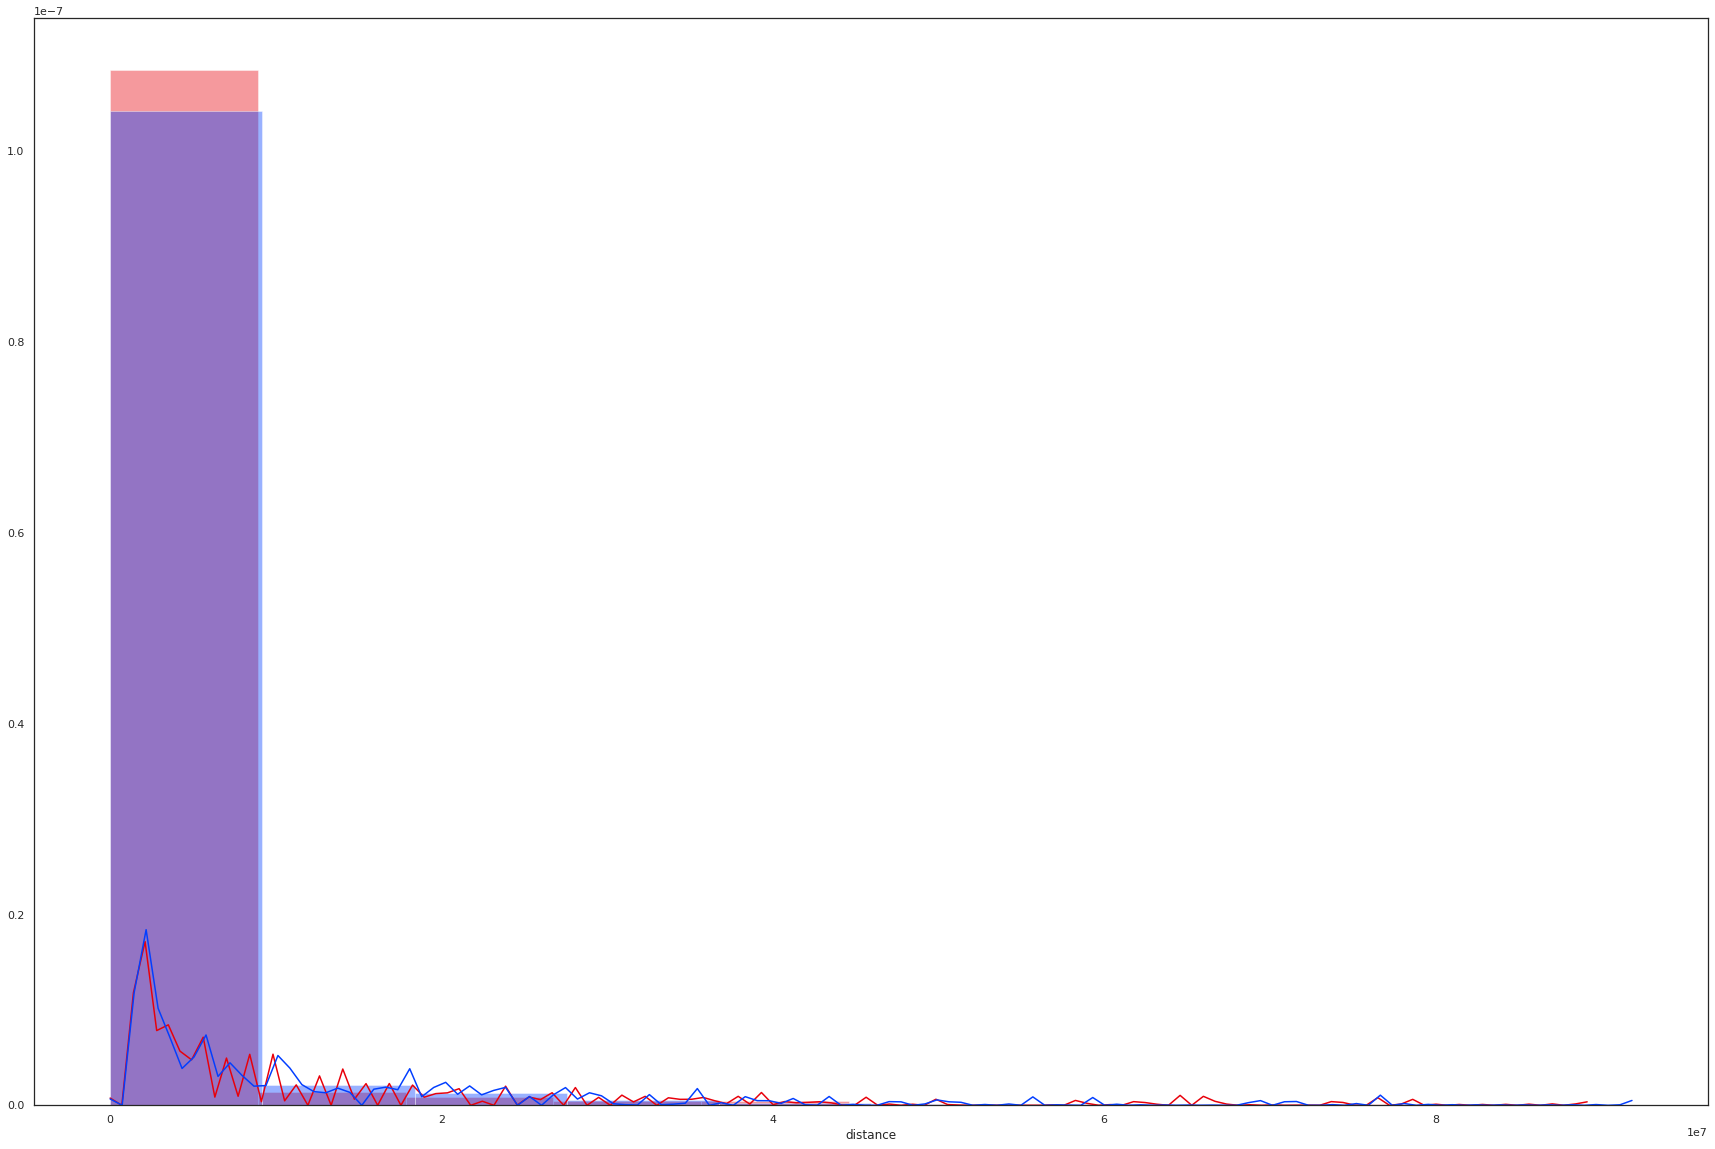

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
# With sns.set you can adjust your graph, choose style - dark grid/white,
# color palette, font etc.
sns.set(style="white", palette="bright", color_codes=True)
# If you run both disttribution plots in the same cell, they
# will be plotted in an overlapping manner.
# Enter the column containing distance for each of the strands in a
# variable, choose bins and discerning colors. Plot the 
# distribution plot of both plus and minus strands.
sns.distplot(a=df_plus["distance"], bins=10, color="r")
sns.distplot(a=df_minus["distance"], bins=10, color="b")
# Adjust the size of the figure.
plt.gcf().set_size_inches((30, 20))

B. You can plot the plus and the minus strand into separate plots.

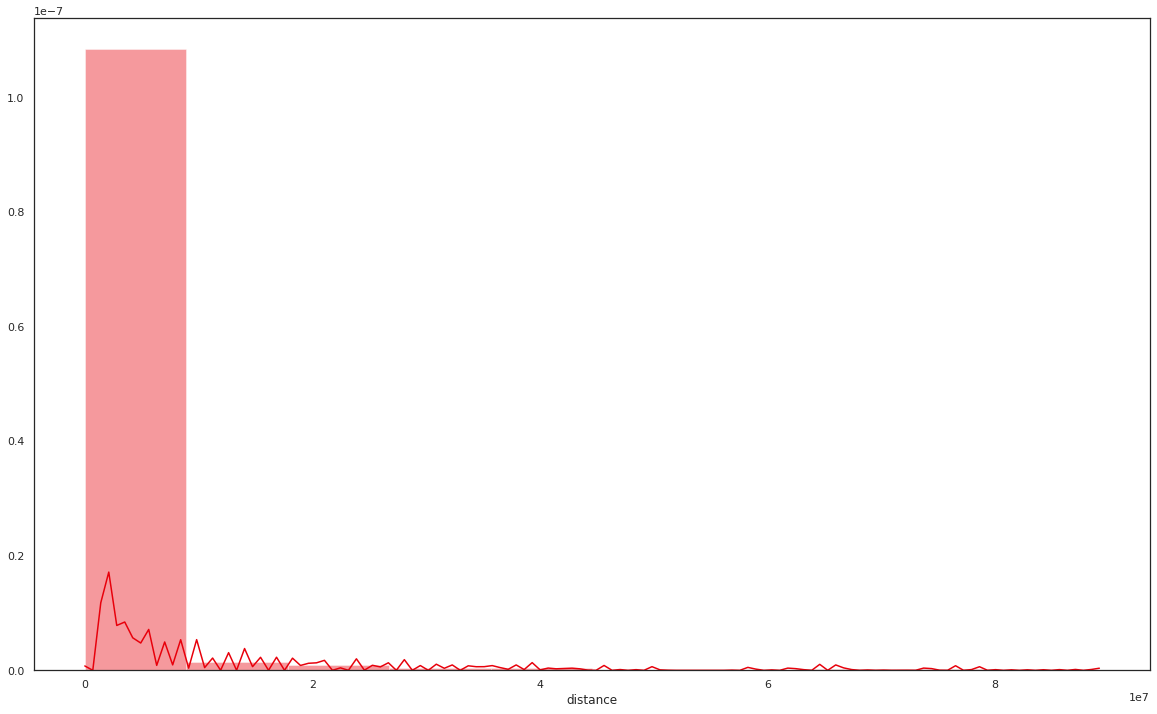

In [136]:
# Plot the distribution plot of the distances on 
# the plus strand.
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="bright", color_codes=True)

sns.distplot(a=df_plus["distance"], bins=10, color="r")
plt.gcf().set_size_inches((20, 12))

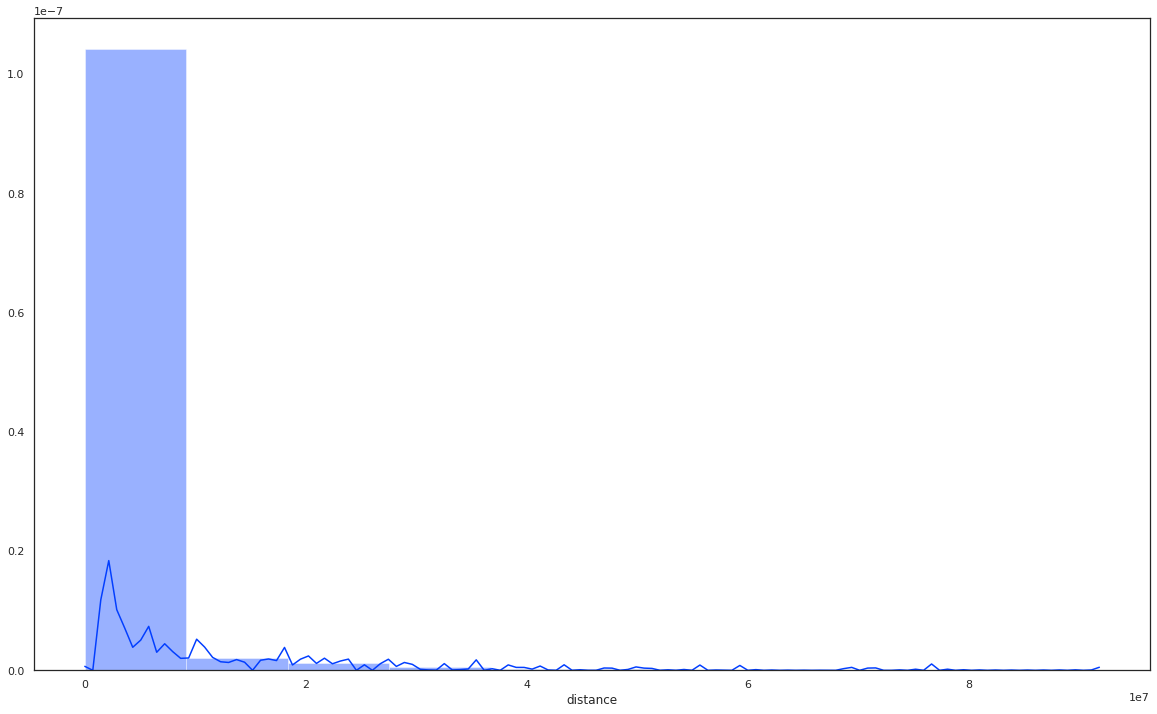

In [137]:
# Plot the distribution plot of the distances on 
# the minus strand.
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="bright", color_codes=True)

sns.distplot(a=df_minus["distance"], bins=10, color="b")
plt.gcf().set_size_inches((20, 12))

C. You can plot the plus and the minus strand into separate subplots using
distplot.

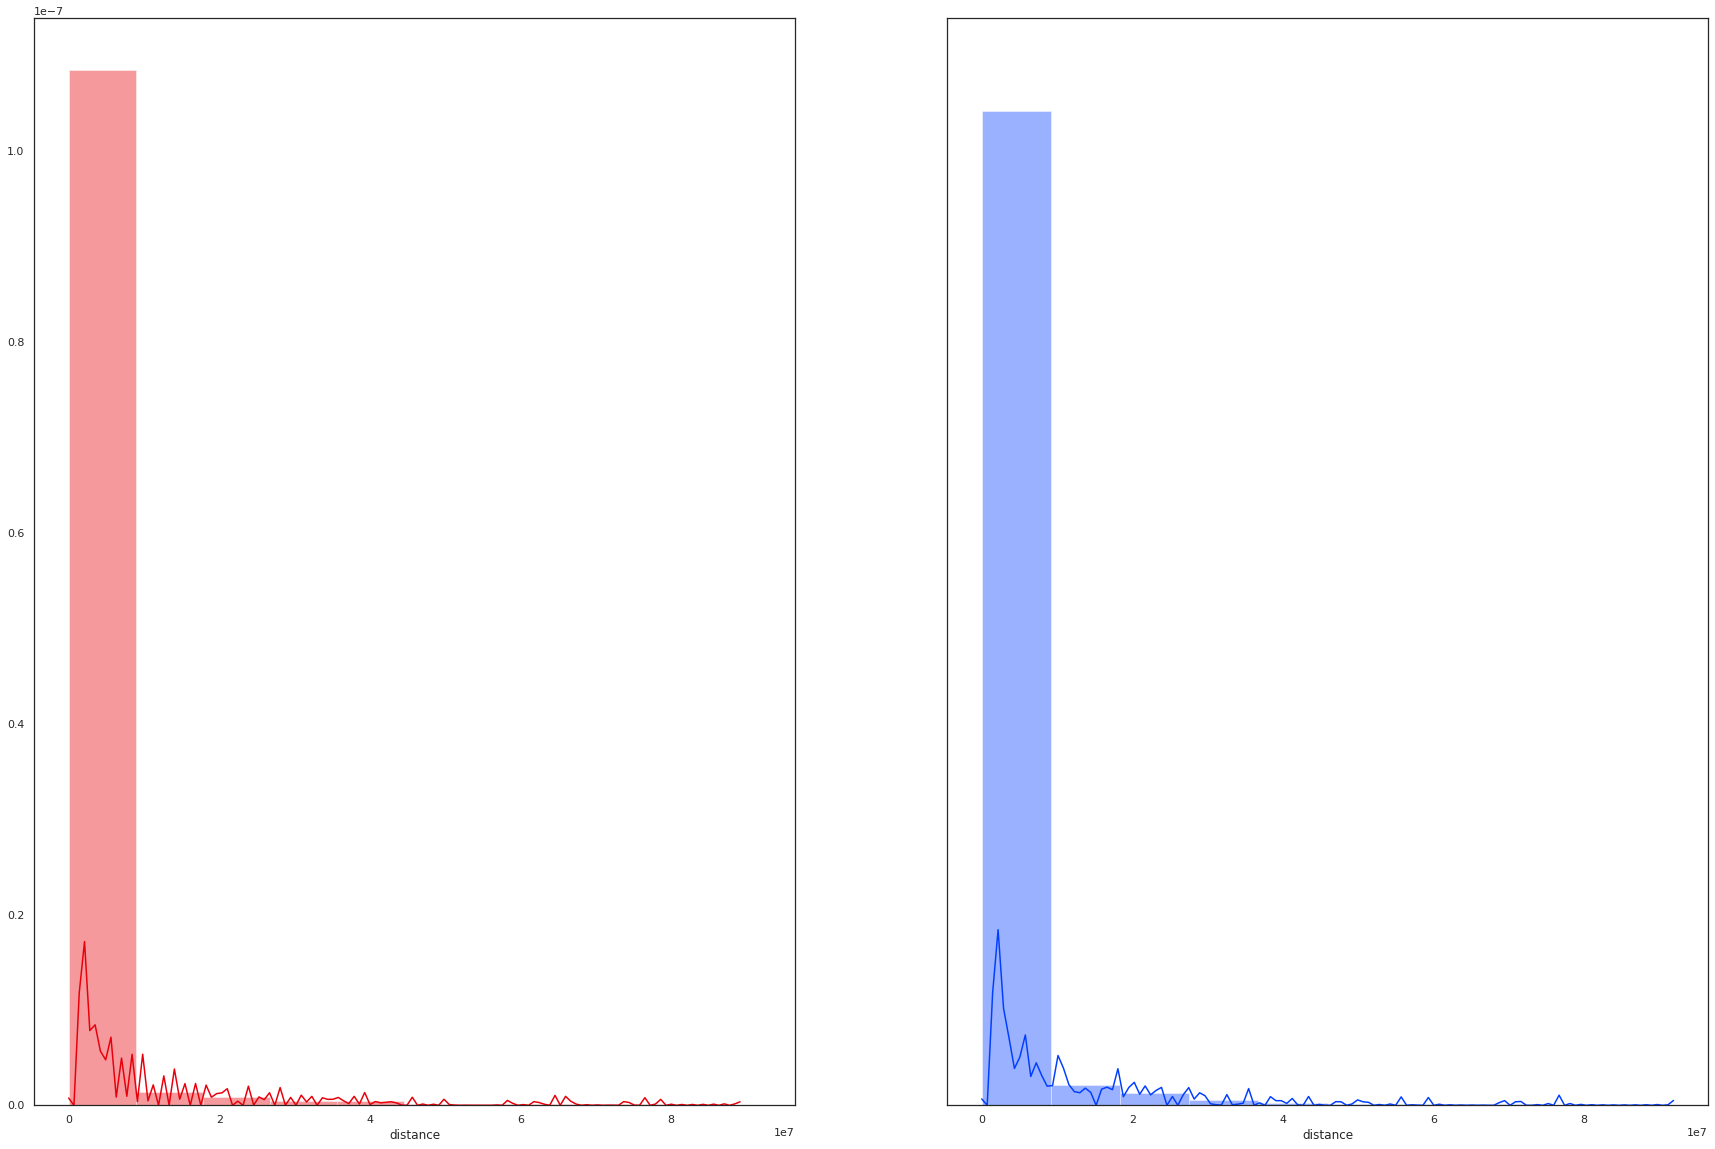

In [138]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="bright", color_codes=True)

# Set up the matplotlib figure. In your case, one row and 
# two columns, share x and y axis to compare them with
# each other. Once the subplots are created, you need to
# fill them with your data in the next step.
f, axes = plt.subplots(1, 2, sharex=True, sharey=True)

# Plot a distribution plot for the plus strand in the left subplot
# ax=axes[0] and for the minus strand in the right subplot ax=axes[1].
sns.distplot(df_plus["distance"], color="r", ax=axes[0], bins=10)
sns.distplot(df_minus["distance"], color="b", ax=axes[1], bins=10)
plt.gcf().set_size_inches((30, 20))

II. For comparison with random data, plot a random distribution plot.

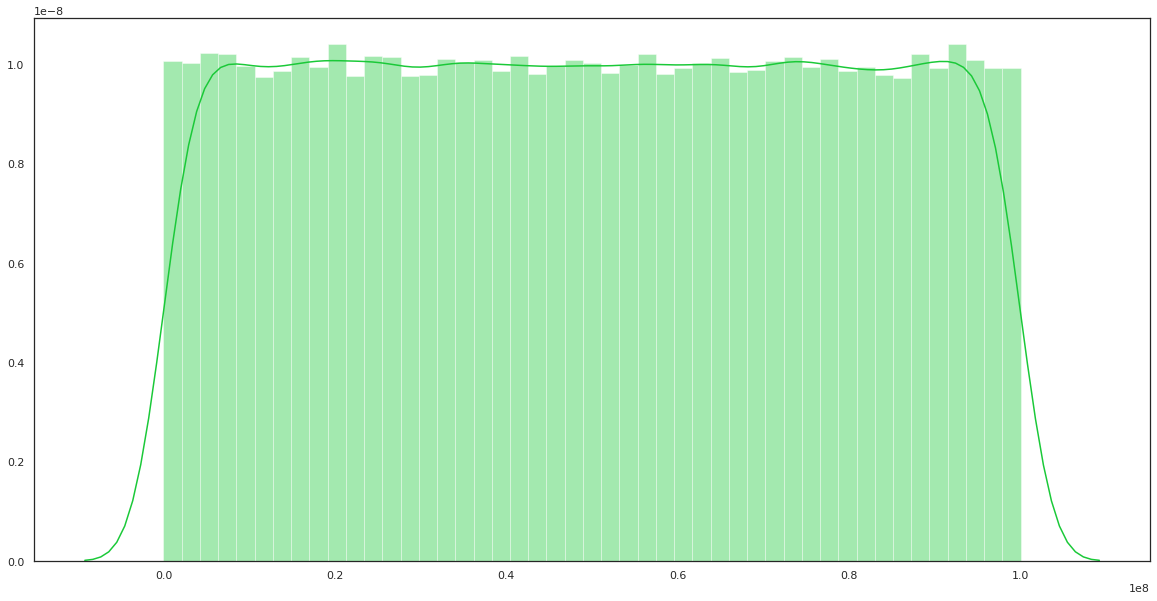

In [139]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="bright", color_codes=True)

# Create an empty list where you will add the the random numbers
# in the range between 0 and arbitrary number.
list_random_int = list()
for i in range(0, 99999):
  list_random_int.append(random.randint(0, 99999999))
sns.distplot(list_random_int, color="g")
plt.gcf().set_size_inches((20, 10))

#**Compressed code for the distribution of the head to head distance between reads.**

This is an unsorted plus strand:
      chrom      start        end          name  score strand
29    chr1    2231243    2231292  FUS_K562_IDR   1000      +
36    chr1    2394449    2394523  FUS_K562_IDR   1000      +
37    chr1    2394338    2394449  FUS_K562_IDR   1000      +
69    chr1    2242180    2242280  FUS_K562_IDR   1000      +
101   chr1   12012355   12012503  FUS_K562_IDR   1000      +
...    ...        ...        ...           ...    ...    ...
4321  chr1    2267630    2267706  FUS_K562_IDR   1000      +
4399  chr1   15847882   15848009  FUS_K562_IDR   1000      +
4415  chr1    2239424    2239492  FUS_K562_IDR   1000      +
4418  chr1   25821200   25821297  FUS_K562_IDR   1000      +
4466  chr1  228144961  228144996  FUS_K562_IDR   1000      +

[172 rows x 6 columns]
This is an unsorted minus strand:
      chrom     start       end          name  score strand
42    chr1  30906205  30906333  FUS_K562_IDR   1000      -
46    chr1  46302345  46302445  FUS_K562_IDR   1000      

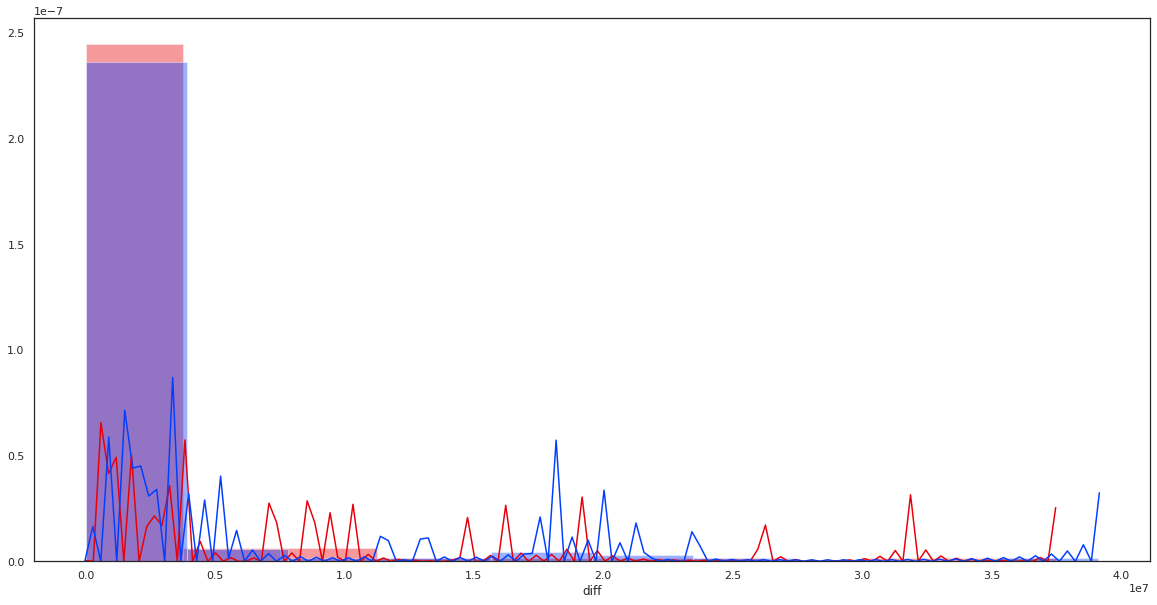

In [158]:
# Alternative approach with loading the BED file directly into Pandas for
# chromosome 1.
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set(style="white", palette="bright", color_codes=True)

# Load BED file, read it, define the tab delimeter as a separator, use only the
# first 5 columns which you are going to need - "chrom,start,end,name,score,strand".
# Notice how they are all inside one string and you can split them after ",".
load_bed = pd.read_csv(
    "ENCFF861KMV.bed",
    sep="\t",
    usecols=[0,1,2,3,4,5],
    names = "chrom,start,end,name,score,strand".split(","))

# Load plus or minus BED strand and chromosome 1.
strand_plus = load_bed[(load_bed.strand=="+") & (load_bed.chrom == "chr1")]
print("This is an unsorted plus strand:\n", strand_plus)
strand_min = load_bed[(load_bed.strand=="-") & (load_bed.chrom == "chr1")]
print("This is an unsorted minus strand:\n", strand_min)

# Sort the chromosome names and end coordinates on the plus strand in 
# an ascending order.
strand_plus = strand_plus.sort_values(by=["chrom", "end"])
print("This is a sorted plus strand:\n", strand_plus)

# You are now calculating the difference between distances on the plus strand 
# and the same distances on the plus strand. Therefore, you need to shift the second 
# data on the plus strand so that you can subtract the first value from 
# the second, the second value from the third as so on.
strand_plus["diff"] = strand_plus["end"].sub(strand_plus["end"].shift())
print("These are the minimal distances on the plus strand:\n", strand_plus["diff"])

# Repeat the process for the minus strand.
strand_min = strand_min.sort_values(by=["chrom", "start"])
strand_min["diff"] = strand_min["start"].sub(strand_min["start"].shift())
print("This is a sorted minus strand:\n", strand_min)
print("These are the minimal distances on the minus strand:\n", strand_min["diff"])

# Plot the distribution plots for the plus and the minus strand.
sns.distplot(strand_plus[(strand_plus["diff"] > 0)]["diff"], bins=10, color="r")
sns.distplot(strand_min[(strand_min["diff"] > 0)]["diff"], bins=10, color="b")
plt.gcf().set_size_inches((20, 10))
# Do not forget to compare the plot with the random distribution plot above.